# **Familles de modèles explorées**

Outre un classifieur factice (_Dummy Classifier_) qui nous fournira une base de référence, nous allons comparer les performances obtenues avec 3 familles de modèles : la régression logistique, la forêt aléatoire et la LGBM.

Nous effectuons ci-dessous une première fois un exemplaire de chacun de ces modèles sur un échantillon réduit, et avec un jeu de paramètres par défaut. Cela nous permet de nous assurer que tout fonctionne bien, avant de passer à l'échelle avec le benchmark.

# Un point rapide sur la complexité algorithmique

Ayons une idée de ce à quoi nous attendre en termes de temps d'exécution et de pression sur la mémoire.

Dans les formulations de complexités algorithmique temporelle et spatiale ci-dessous, $m$ représente le nombre d'échantillons (`n_samples`) dans l'ensemble d'entraînement, $n$ le nombre de caractéristiques (`n_features`), c'est-à-dire la dimensionnalité, et $k$ le nombre d'itérations (`n_iter`) effectuées par l'algorithme.

Par défaut, l'expression *complexité algorithmique* sans davantage de précision fait référence à la complexité algorithmique temporelle, c'est-à-dire celle qui détermine le temps d'exécution.

## Régression logistique

La complexité algorithmique de la régression logistique dépend principalement de l'algorithme d'optimisation utilisé pour minimiser la fonction de coût.

L'algorithme le plus couramment utilisé est la [**descente de gradient stochastique** (SGD)](https://en.wikipedia.org/wiki/Stochastic_gradient_descent), qui a une complexité algorithmique de $\mathcal{O}(kmn)$.

Cependant, il existe également des variantes plus efficaces de la descente de gradient stochastique, telles que la descente de gradient stochastique moyenne (SGDM), qui ont une complexité algorithmique inférieure. De plus, la bibliothèque scikit-learn utilise une implémentation optimisée de la régression logistique, qui utilise une régularisation $\ell_2$ (par défaut) pour éviter le surapprentissage et qui peut également utiliser un algorithme de descente de gradient plus avancé, tels que [**L-BFGS**](https://en.wikipedia.org/wiki/Limited-memory_BFGS) et [**Conjugate Gradient**](https://en.wikipedia.org/wiki/Conjugate_gradient_method), en fonction des paramètres d'entrée.

En résumé, la complexité de la régression logistique dépend de nombreux facteurs tels que l'algorithme d'optimisation, la régularisation, les caractéristiques de l'ensemble de données, etc. Dans la pratique, la régression logistique est souvent considérée comme un modèle à haute performance avec une complexité algorithmique raisonnable, ce qui en fait un choix populaire pour de nombreuses tâches de classification.

**SGD** : la complexité de la SGD dépend du nombre d'itérations et de la taille du lot (*batch*) utilisé. En général, la complexité est proportionnelle au produit du nombre d'itérations, de la taille du lot et de la dimensionnalité des données. Ainsi, si l'on note $b$ la taille du lot, la complexité de la SGD est en $\mathcal{O}(kmn/b)$.

**L-BFGS** : la complexité de L-BFGS dépend du nombre de variables et de l'ordre de la [méthode de **Quasi-Newton**](https://en.wikipedia.org/wiki/Quasi-Newton_method) utilisée. En général, la complexité est proportionnelle au produit du nombre de variables et du carré de l'ordre de la méthode. Ainsi, si l'on note $p$ l'ordre de la méthode de Quasi-Newton utilisée, la complexité de L-BFGS est en $\mathcal{O}(pn^2)$. La méthode L-BFGS est souvent plus rapide que la SGD pour les problèmes de régression logistique, car elle utilise une approximation de la matrice hessienne qui peut accélérer la convergence.

Complexité spatiale (pression sur la mémoire) :
* SGD : $\mathcal{O}(1)$
* Liblinear : $\mathcal{O}(n)$
* L-BFGS : $\mathcal{O}(kn)$
* Newton-CG : $\mathcal{O}(n^2)$

Remarque : ces complexités spatiales concernent uniquement les poids des modèles et ne prennent pas en compte les autres paramètres tels que les biais ou les intercepteurs.

## Forêt aléatoire

La complexité algorithmique de la forêt aléatoire (qui fait partie des méthodes ensemblistes) dépend principalement du nombre d'arbres (`n_estimators` que nous noterons $t$) dans la forêt et du nombre de caractéristiques (`max_features`) utilisées pour construire chaque arbre.

Dans le pire des cas, la complexité algorithmique de la forêt aléatoire est en $\mathcal{O}(tn^2)$, car chaque arbre peut nécessiter $\mathcal{O}(n^2)$ opérations pour sélectionner les meilleures caractéristiques à chaque nœud. Cependant, en pratique, cette complexité peut être considérablement réduite en utilisant des méthodes de sélection de caractéristiques plus efficaces et en limitant la profondeur des arbres.

La forêt aléatoire est un algorithme très efficace pour la classification et la régression sur de grands ensembles de données, car, contrairement à celui de l'arbre de décision, elle peut être facilement parallélisée et peut gérer des ensembles de données avec des millions d'échantillons et des milliers de caractéristiques. De plus, la forêt aléatoire est généralement robuste aux données manquantes et aux valeurs aberrantes.

La complexité spatiale de la forêt aléatoire dépend également du nombre $t$ d'arbres dans la forêt et du nombre de $n$ caractéristiques considérées pour chaque division. La complexité spatiale de la forêt aléatoire est d'environ $\mathcal{O}(tn)$. Cela est dû au fait que les poids de chaque arbre sont stockés en mémoire. Cependant, en pratique, la forêt aléatoire utilise souvent moins de mémoire que d'autres modèles de classification, car elle ne nécessite pas de stocker une matrice de covariance complète, contrairement aux modèles de classification basés sur la méthode de la régression logistique.

## LGBMClassifier

La bibliothèque LightGBM est une implémentation de gradient boosting qui utilise des algorithmes d'optimisation basés sur les arbres. L'algorithme LightGBM a été conçu pour être plus rapide et plus efficace que d'autres implémentations de gradient boosting, grâce à des techniques telles que la création d'histogrammes pour discrétiser les valeurs continues des caractéristiques.

La complexité algorithmique de LGBMClassifier dépend principalement du nombre d'arbres (`n_estimators`, noté $t$) et de la profondeur / hauteur des arbres (`max_depth` $\approx \log(n)$ si elle n'est pas limitée par un maximum $d$).

La complexité temporelle est en général de l'ordre de $\mathcal{O}(tmn\log(n))$.

Dans la pratique, le temps d'exécution de LGBMClassifier dépendra également de nombreux autres facteurs, tels que la taille de l'ensemble de données, les hyperparamètres choisis, etc. Cependant, LightGBM est généralement considéré comme un modèle à haute performance pour la classification et la régression, et est largement utilisé dans de nombreuses applications pratiques.

Complexité spatiale de la LightGBM : $\mathcal{O}(clt)$ avec $l$ le nombre de feuilles par arbre (`n_leaves`) et $c$ le nombre de classes cibles.

# Classifieur naïf : la base de référence 

Nous utilisons un [**`DummyClassifier`**](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) de Scikit-learn paramétré avec `strategy="most_frequent"`.

Paramétré avec cette stratégie, le classifieur naïf prédira systématiquement la classe dominante.

Ce classifieur va nous servir de base de référence à laquelle comparer les performances prédictives de classifieurs plus avancés.

Le classifieur naïf donne nécessairement un score AUC ROC de 0,5 [[**StackExchange** > *Can AUC-ROC be between 0-0.5?*](https://stats.stackexchange.com/questions/266387/can-auc-roc-be-between-0-0-5)].

In [ ]:
import numpy as np
from sklearn.dummy import DummyClassifier
X = np.array([-1, 1, 1, 1])
y = np.array([0, 1, 1, 1])
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
dummy_clf.predict(X)
dummy_clf.score(X, y)

0.75

# Régression Logistique

Références :
* http://faculty.marshall.usc.edu/gareth-james/ => n'est plus accessible
* https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/ => pas gratuit

Ici, je me concentrerai sur la mise en œuvre du modèle plutôt que sur l'explication des détails, mais pour ceux qui veulent en savoir plus sur la théorie des algorithmes d'apprentissage automatique, je recommande à la fois "An Introduction to Statistical Learning" et "Hands-On Machine Learning with Scikit-Learn and TensorFlow". Ces deux livres présentent la théorie ainsi que le code nécessaire pour créer les modèles (en R et en Python respectivement). Ils enseignent tous deux avec l'idée que la meilleure façon d'apprendre est de faire, et ils sont très efficaces!

Pour obtenir une base de référence, nous utiliserons toutes les caractéristiques, après encodage des variables catégorielles. Nous prétraiterons les données en remplissant les valeurs manquantes (imputation) et en normalisant la plage des caractéristiques (mise à l'échelle des caractéristiques). Le code suivant effectue ces deux étapes de prétraitement.

----

La régression logistique de scikit-learn n'a pas de méthode intégrée pour récupérer les importances de caractéristiques (*feature importances*) comme c'est le cas pour les modèles de type arbre, tels que les RandomForest ou les XGBoost.

Cependant, il est possible d'approximer les importances de caractéristiques en utilisant les coefficients de régression. Les coefficients indiquent l'importance relative de chaque caractéristique dans la prédiction de la variable cible. Plus un coefficient est grand, plus la caractéristique associée est importante. Evidemment, cela ne tient que sous hypothèse que les données ont été préalablement normalisées et sont donc à la même échelle.

Test sur l'échantillon de $10\,000$ avec ré-échantillonnage et mise à l'échelle par défaut.

In [ ]:
from home_credit.load import load_prep_dataset
from home_credit.best_model_search import kfold_train_and_eval_model
from sklearn.linear_model import LogisticRegression

data = load_prep_dataset("baseline_v1")
data = data.sample(10_000)
clf = LogisticRegression(C=1e-4, random_state=42)
res = kfold_train_and_eval_model(
    data, clf,
    verbosity=3
)


Starting train and eval of:
Labeled dataset of shape: (10000, 790)
Features set of shape: (10000, 788)

With:
Classifier: 


LogisticRegression(C=0.0001, random_state=42)

Loss function: 


{'AUC': <function sklearn.metrics._ranking.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)>}

Eval metrics: 


{'F2': <function home_credit.best_model_search.<lambda>(y_valid, y_pred)>,
 'AUC': <function sklearn.metrics._ranking.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)>}

On 5 KFolds: 

Resampling
Sampler: 


SMOTETomek()

Original dataset shape: Counter({0.0: 7921, -1.0: 1399, 1.0: 680})
Resampled dataset shape: Counter({1.0: 7742, -1.0: 7655, 0.0: 7582})

Train vs. test subsets shapes
	Train shape: (15324, 788)
	Test shape: (7655, 788)

Evaluate the 1-th fold (on 5)
Fold  0 F2: 0.720709
Fold  0 AUC: 0.701474

Evaluate the 2-th fold (on 5)
Fold  1 F2: 0.736849
Fold  1 AUC: 0.698648

Evaluate the 3-th fold (on 5)
Fold  2 F2: 0.731494
Fold  2 AUC: 0.702636

Evaluate the 4-th fold (on 5)
Fold  3 F2: 0.713490
Fold  3 AUC: 0.711704

Evaluate the 5-th fold (on 5)
Fold  4 F2: 0.741157
Fold  4 AUC: 0.732343
Full F2: 0.728718
Full AUC: 0.708485


Courbe ROC et AUC :

overall AUC verif: 0.7084850855821695


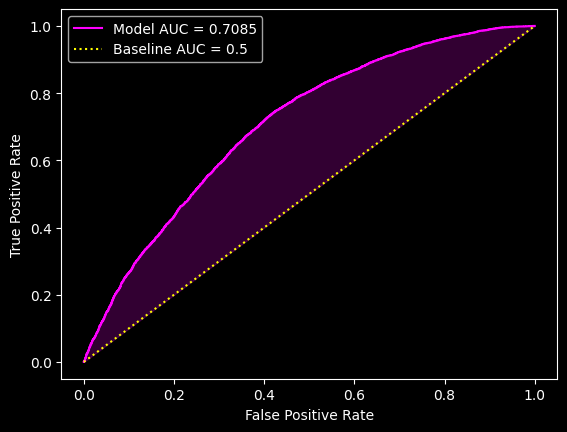

In [ ]:
from home_credit.best_model_search import plot_roc_curve
from sklearn.metrics import roc_auc_score
y_train = res["resamples"]["y_train"]
train_pred_proba = res["preds"]["train"]["proba"]
overall_auc = res["scores"]['AUC']['overall']
print("overall AUC verif:", roc_auc_score(y_train, train_pred_proba))
plot_roc_curve(y_train, train_pred_proba, overall_auc)

Matrice de confusion


Confusion matrix


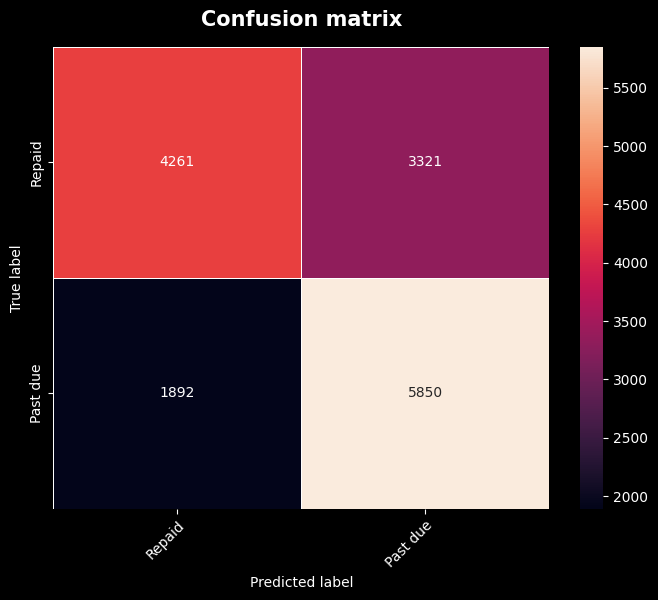

In [ ]:
from pepper.scoring import show_confusion_matrix
y_train = res["resamples"]["y_train"]
train_pred_discr = res["preds"]["train"]["discr"]
show_confusion_matrix(y_train, train_pred_discr, ["Repaid", "Past due"])

,feature,importance,fold
0,ACTIVE_AMT_ANNUITY_MAX,-0.000033,0
1,ACTIVE_AMT_ANNUITY_MEAN,-0.000145,0
2,ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN,0.000801,0
3,ACTIVE_AMT_CREDIT_SUM_DEBT_MAX,-0.000114,0
4,ACTIVE_AMT_CREDIT_SUM_DEBT_MEAN,-0.000238,0
...,...,...,...
783,YEARS_BEGINEXPLUATATION_MEDI,-0.000409,4
784,YEARS_BEGINEXPLUATATION_MODE,-0.000290,4
785,YEARS_BUILD_AVG,-0.001552,4
786,YEARS_BUILD_MEDI,-0.001620,4


,importance
feature,
CODE_GENDER_M,0.031026
NAME_EDUCATION_TYPE_Secondary_secondary_special,0.030517
NAME_INCOME_TYPE_Working,0.029999
DAYS_BIRTH,0.018470
BURO_DAYS_CREDIT_MIN,0.018252
...,...
BURO_CREDIT_ACTIVE_Closed_MEAN,-0.016998
NAME_FAMILY_STATUS_Married,-0.019992
EXT_SOURCE_3,-0.029804


,feature,importance
0,CODE_GENDER_M,0.031026
1,NAME_EDUCATION_TYPE_Secondary_secondary_special,0.030517
2,NAME_INCOME_TYPE_Working,0.029999
3,DAYS_BIRTH,0.018470
4,BURO_DAYS_CREDIT_MIN,0.018252
...,...,...
783,BURO_CREDIT_ACTIVE_Closed_MEAN,-0.016998
784,NAME_FAMILY_STATUS_Married,-0.019992
785,EXT_SOURCE_3,-0.029804
786,NAME_EDUCATION_TYPE_Higher_education,-0.032042


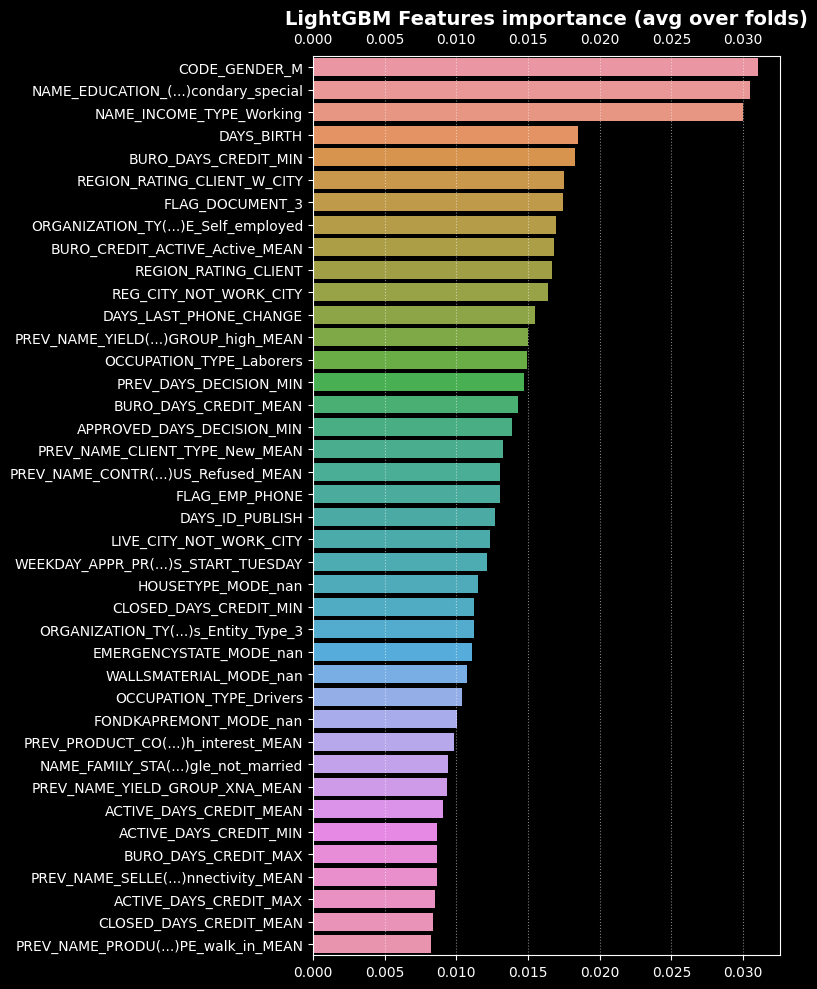

In [ ]:
from home_credit.lightgbm_kernel_v2 import display_importances
feat_imps = res["feat_imps"]
selected_best_feats = display_importances(feat_imps)

## Chute : soumission Kaggle

Références :
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Nous allons utiliser la [**`LogisticRegression` de Scikit-Learn**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) pour notre premier modèle. La seule modification que nous apporterons aux paramètres par défaut du modèle sera de baisser le [**paramètre de régularisation, C**](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression), qui contrôle le niveau de sur-apprentissage (une valeur plus faible devrait diminuer le sur-apprentissage). Cela nous donnera des résultats légèrement meilleurs que la `LogisticRegression` par défaut, mais cela fixera tout de même une barre basse pour tous les modèles futurs.

Ici, nous utilisons la syntaxe familière de modélisation de Scikit-Learn : nous créons d'abord le modèle, puis nous l'entraînons en utilisant `.fit` et ensuite nous faisons des prédictions sur les données de test en utilisant `.predict_proba` (rappelez-vous que nous voulons des probabilités et non un 0 ou 1).

Maintenant que le modèle a été entraîné, nous pouvons l'utiliser pour faire des prédictions. Nous voulons prédire les probabilités de non-remboursement d'un prêt, donc nous utilisons la méthode predict.proba du modèle. Cela renvoie un tableau de dimensions m x 2 où m est le nombre d'observations. La première colonne est la probabilité que la cible soit 0 et la deuxième colonne est la probabilité que la cible soit 1 (donc pour une seule ligne, les deux colonnes doivent s'additionner à 1). Nous voulons la probabilité que le prêt ne soit pas remboursé, donc nous sélectionnons la deuxième colonne.

Le code suivant effectue les prédictions et sélectionne la bonne colonne.

In [ ]:
# Save the submission to a csv file
submit.to_csv('log_reg_baseline.csv', index=False)

La soumission a maintenant été sauvegardée dans l'environnement virtuel dans lequel notre notebook s'exécute. Pour accéder à la soumission, à la fin du notebook, nous appuierons sur le bouton bleu "Commit & Run" en haut à droite du noyau. Cela exécute l'ensemble du notebook, puis nous permet de télécharger tous les fichiers qui ont été créés pendant l'exécution.

Une fois que nous avons exécuté le notebook, les fichiers créés sont disponibles dans l'onglet "Versions" sous l'onglet "Output". À partir de là, les fichiers de soumission peuvent être soumis à la compétition ou téléchargés. Comme il y a plusieurs modèles dans ce notebook, il y aura plusieurs fichiers de sortie.

**Le score de base de la régression logistique devrait être d'environ 0,671 lorsqu'il est soumis.**

# Modèle amélioré : Forêt aléatoire

Pour essayer de battre les mauvaises performances de notre modèle de base, nous pouvons mettre à jour l'algorithme. Essayons d'utiliser une forêt aléatoire sur les mêmes données d'entraînement pour voir comment cela affecte les performances. La forêt aléatoire est un modèle beaucoup plus puissant que la régression logistique, surtout lorsque nous utilisons des centaines d'arbres. Nous utiliserons 100 arbres dans la forêt aléatoire.

Ces prévisions seront également disponibles lorsque nous exécuterons l'ensemble du notebook.

**Ce modèle devrait avoir un score d'environ 0,678 lorsqu'il est soumis.**

In [ ]:
from home_credit.load import load_prep_dataset
from home_credit.best_model_search import kfold_train_and_eval_model
from sklearn.ensemble import RandomForestClassifier

data = load_prep_dataset("baseline_v1")
data = data.sample(10_000)

# Create the random forest classifier
clf = RandomForestClassifier(
    n_estimators=100, random_state=42,
    verbose=1, n_jobs=-1
)

# Train and cross eval it
res = kfold_train_and_eval_model(
    data, clf,
    verbosity=3
)


Starting train and eval of:
Labeled dataset of shape: (10000, 790)
Features set of shape: (10000, 788)

With:
Classifier: 


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1)

Loss function: 


{'AUC': <function sklearn.metrics._ranking.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)>}

Eval metrics: 


{'F2': <function home_credit.best_model_search.<lambda>(y_valid, y_pred)>,
 'AUC': <function sklearn.metrics._ranking.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)>}

On 5 KFolds: 

Resampling
Sampler: 


SMOTETomek()

Original dataset shape: Counter({0.0: 7891, -1.0: 1373, 1.0: 736})
Resampled dataset shape: Counter({1.0: 7713, -1.0: 7632, 0.0: 7566})

Train vs. test subsets shapes
	Train shape: (15279, 788)
	Test shape: (7632, 788)

Evaluate the 1-th fold (on 5)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Fold  0 F2: 0.940910
Fold  0 AUC: 0.994281

Evaluate the 2-th fold (on 5)


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Fold  1 F2: 0.942714
Fold  1 AUC: 0.992358

Evaluate the 3-th fold (on 5)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Fold  2 F2: 0.934510
Fold  2 AUC: 0.993590

Evaluate the 4-th fold (on 5)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Fold  3 F2: 0.929779
Fold  3 AUC: 0.991059

Evaluate the 5-th fold (on 5)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s


Fold  4 F2: 0.934308
Fold  4 AUC: 0.991845
Full F2: 0.936422
Full AUC: 0.992594


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


## Courbe ROC et AUC

overall AUC verif: 0.9925937030076379


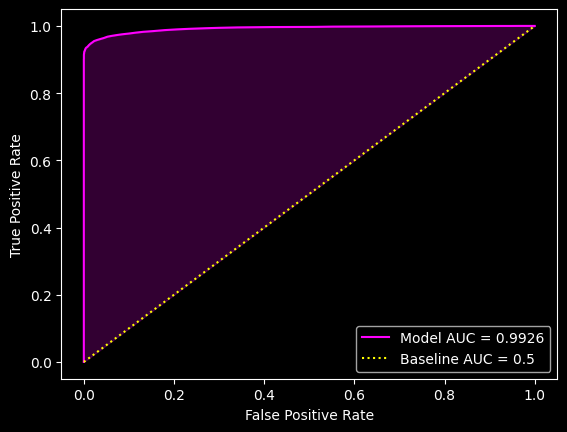

In [ ]:
from home_credit.best_model_search import plot_roc_curve
from sklearn.metrics import roc_auc_score
y_train = res["resamples"]["y_train"]
train_pred_proba = res["preds"]["train"]["proba"]
overall_auc = res["scores"]['AUC']['overall']
print("overall AUC verif:", roc_auc_score(y_train, train_pred_proba))
plot_roc_curve(y_train, train_pred_proba, overall_auc)

## Matrice de confusion


Confusion matrix


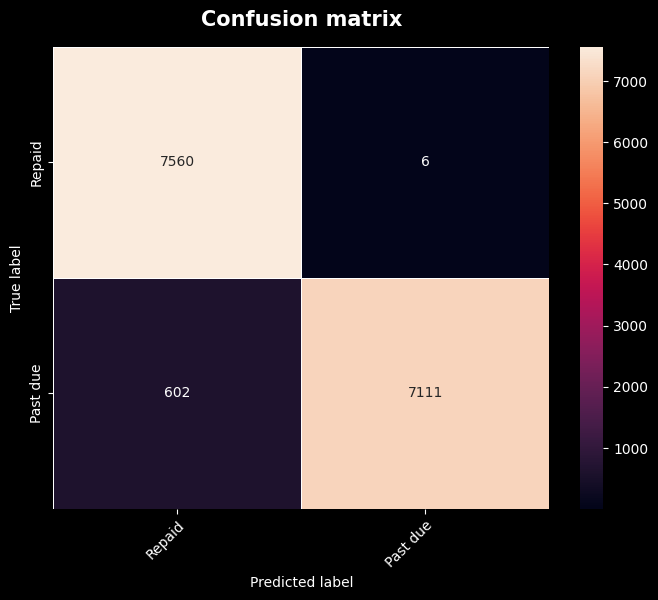

In [ ]:
from pepper.scoring import show_confusion_matrix
y_train = res["resamples"]["y_train"]
train_pred_discr = res["preds"]["train"]["discr"]
show_confusion_matrix(y_train, train_pred_discr, ["Repaid", "Past due"])

## Importance des caractéristiques

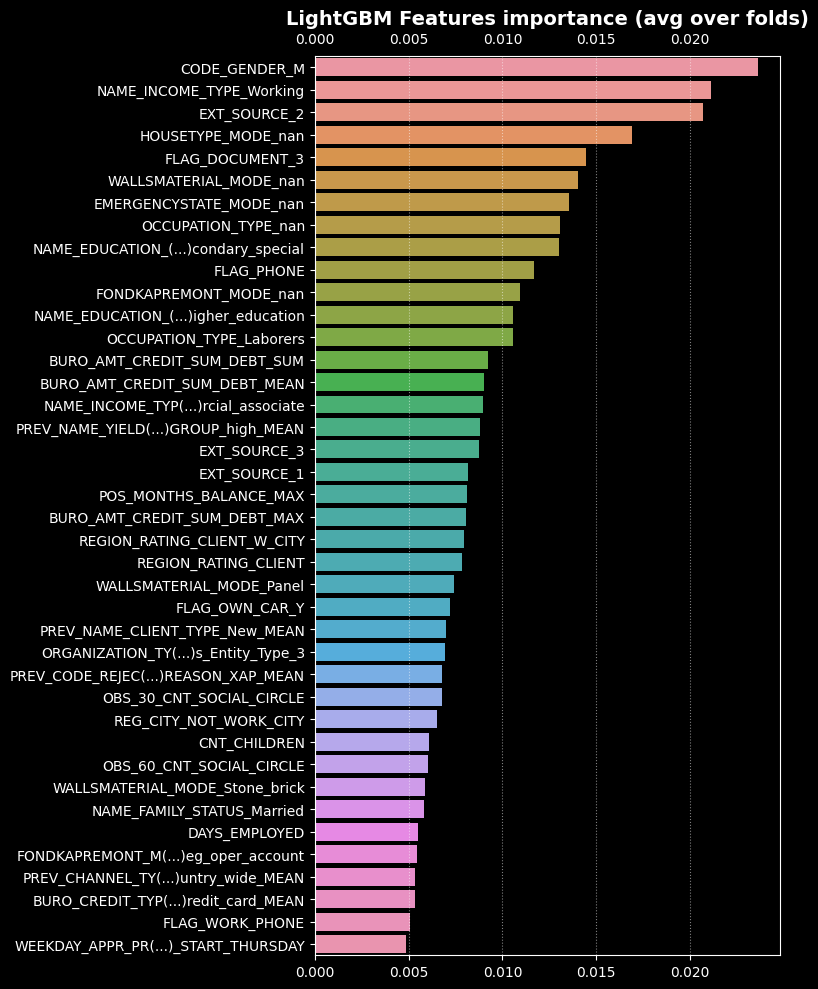

In [ ]:
from home_credit.lightgbm_kernel_v2 import display_importances
feat_imps = res["feat_imps"]
selected_best_feats = display_importances(feat_imps)

# Modèle de performance : LGBM

Nous l'avons déjà étudié apprécié plus haut (cahier **`3_train_and_eval.ipynb`**), il a été notre base de départ de fait.